# PyBer Alanylsis

### What does %Matplotlib inline mean?
##### %matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [3]:
# Add the Matplotlib magic command
%matplotlib inline

# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd

#### Load CSV files

In [4]:
# Read City Data
city_data_df = pd.read_csv("Resources/city_data.csv")
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read Ride data
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


#### Inspect Data

In [8]:
# Inspect City Data
# Get Columns/Rows not null using Count()
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [9]:
# Get Columns/Rows not null using isnull().sum()
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [10]:
# Get Data Types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
# Find the number of data points by city type
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
# Find how many per city type = "Urban"
sum(city_data_df["type"]=="Urban")

66

In [18]:
sum(city_data_df['type']=='Suburban')

36

In [19]:
sum(city_data_df['type']=='Rural')

18

In [20]:
# Inspect Rida Data
# Get Columns/Rows not null using Count()
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [21]:
# Get Columns/Rows not null using isnull().sum()
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [22]:
# Check field data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [23]:
# Merge bot data frames using the "City" field, using the ride_data_df as the left dataframe
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Show resulting Data Frame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


#### Create individual DataFrames for each Type of City
This will facilitate the process, please notice that new DataFrame names were changed to reduce typing.

In [25]:
# Urban
urban_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [27]:
# Suburban
suburban_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [29]:
# Rural
rural_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


### For reference purposes only
This is how the chart should look at the end
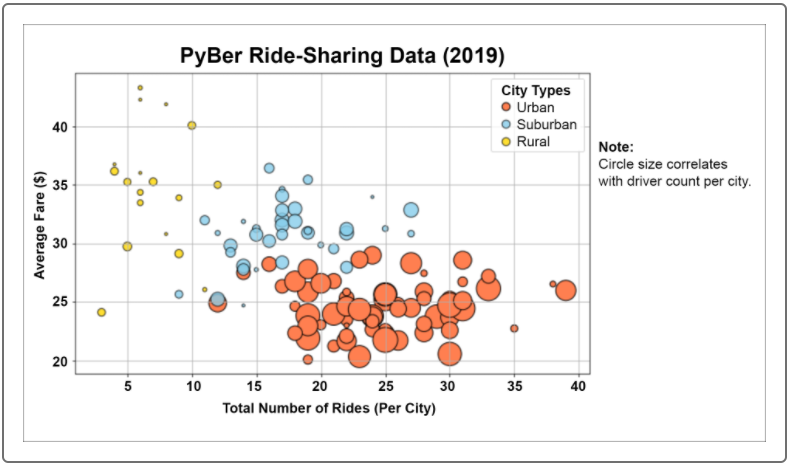

In [34]:
# Get the number of rides per city type
# Urban
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [38]:
# Now get other types
# Suburban
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]

# Rural
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

In [40]:
# Get the Average fare per city type
# Urban
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [43]:
# Now get other types
# Suburban
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]

# Rural
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

In [45]:
# Get the average number of drivers per city type
# Urban
urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [49]:
# Now get other types
# Suburban
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]

# Rural
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]

### Create Bubble Charts

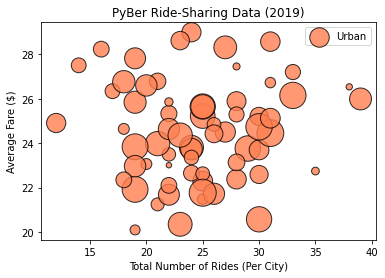

In [87]:
# Create it for Urban Cities
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.show()

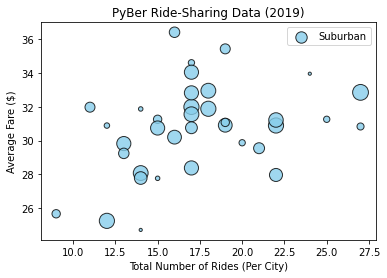

In [82]:
# Create it for Suburban Cities
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.show()

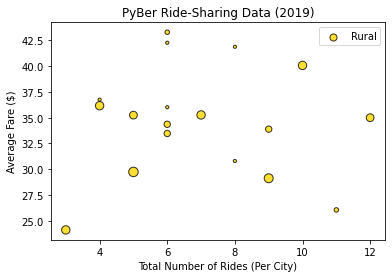

In [76]:
# Create it for Rural Cities
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.show()

### Combine the 3 Charts into 1 Chart

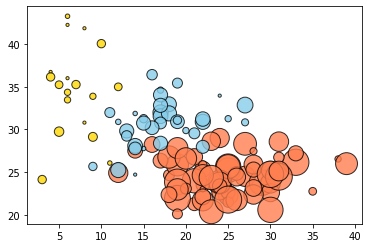

In [90]:
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

plt.show()

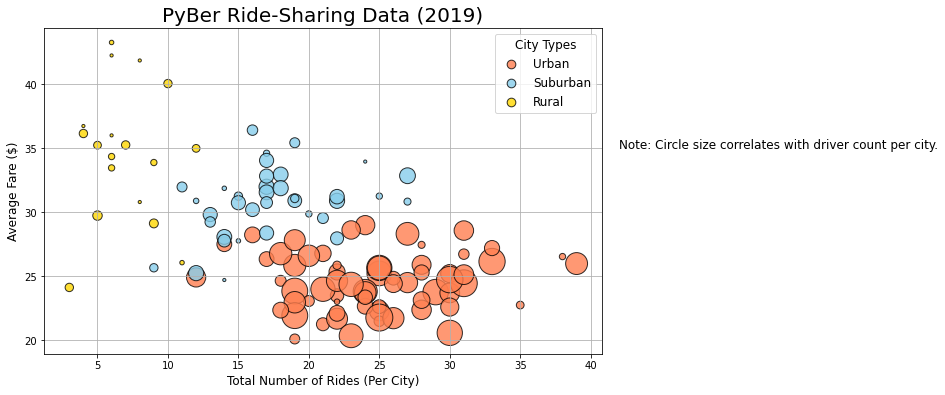

In [111]:
# Add each city type to the chart
# Set a new chart figure size to better see the results
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Set Title and axis labels, but now altering font size
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)

# Show the grid
plt.grid(True)

# Since the markers in the legend are appearing in a different size, we need to fix this
# Create a legend object
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add Legend - remarked as the legend will be showed above
#plt.legend()

# Add note
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the Figure, it should be done prior to showing the chart, otherwise it gets saved blank
plt.savefig("Analysis/Fig1.png")

# Show the chart
plt.show()

### Summary Statistics

#### Pandas describe()

In [117]:
# Get City summary statistics
urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [118]:
suburban_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [120]:
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [121]:
# Get Rides Summary Statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [123]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [124]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

#### Pandas mean(), median(), and mode() Methods

In [129]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [131]:
# Calculate the median of the ride count for each city type
urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [132]:
# Calculate the mode of the ride count
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [133]:
suburban_ride_count.mode()

0    17
dtype: int64

In [134]:
rural_ride_count.mode()

0    6
dtype: int64

#### NumPy mean() and median() Functions and SciPy mode() Function

In [137]:
# Import dependencies
import numpy as np
import scipy.stats as sts

In [151]:
# Calculate the measure f central tendency for the Ride Count
print("Urban ----------------------------------")
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The Mean for Ride Counts for Urban cities is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The Median for Ride Counts for Urban cities is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The Mode for Ride Counts for Urban cities is {mode_urban_ride_count}.")

print("\nSuburban ----------------------------------")

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for Ride Counts for Suburban cities is {mean_suburban_ride_count}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The Median for Ride Counts for Suburban cities is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The Mode for Ride Counts for Suburban cities is {mode_suburban_ride_count}.")

print("\nRural ----------------------------------")

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for Ride Counts for Rural cities is {mean_rural_ride_count}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The Median for Ride Counts for Rural cities is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The Mode for Ride Counts for Rural cities is {mode_rural_ride_count}.")

Urban ----------------------------------
The Mean for Ride Counts for Urban cities is 24.62.
The Median for Ride Counts for Urban cities is 24.0.
The Mode for Ride Counts for Urban cities is ModeResult(mode=array([22], dtype=int64), count=array([7])).

Suburban ----------------------------------
The mean for Ride Counts for Suburban cities is 17.36111111111111.
The Median for Ride Counts for Suburban cities is 17.0.
The Mode for Ride Counts for Suburban cities is ModeResult(mode=array([17], dtype=int64), count=array([7])).

Rural ----------------------------------
The mean for Ride Counts for Rural cities is 6.944444444444445.
The Median for Ride Counts for Rural cities is 6.0.
The Mode for Ride Counts for Rural cities is ModeResult(mode=array([6], dtype=int64), count=array([5])).


#### Summary Statistics for the Fare by City Type

In [153]:
# Get the fares for Urban Cities
urban_fares = urban_df["fare"]
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [160]:
# Get the fares for Suburban and Rural Cities
suburban_fares = suburban_df["fare"]
rural_fares = rural_df["fare"]

In [161]:
# Calculate the measurement of central tendency
print("Urban ----------------------------------")
mean_urban_fares = np.mean(urban_fares)
print(f"The Mean fare price for Urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The Median fare price for Urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The Mode fare price for Urban trips is {mode_urban_fares}.")

print("\nSuburban ----------------------------------")
mean_suburban_fares = np.mean(suburban_fares)
print(f"The Mean fare price for Suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The Median fare price for Suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The Mode fare price for Subrban trips is {mode_suburban_fares}.")

print("\nRural ----------------------------------")
mean_rural_fares = np.mean(rural_fares)
print(f"The Mean fare price for Rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The Median fare price for Rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The Mode fare price for Rural trips is {mode_rural_fares}.")

Urban ----------------------------------
The Mean fare price for Urban trips is $24.53.
The Median fare price for Urban trips is $24.64.
The Mode fare price for Urban trips is ModeResult(mode=array([22.86]), count=array([5])).

Suburban ----------------------------------
The Mean fare price for Suburban trips is $30.97.
The Median fare price for Suburban trips is $30.75.
The Mode fare price for Subrban trips is ModeResult(mode=array([17.99]), count=array([3])).

Rural ----------------------------------
The Mean fare price for Rural trips is $34.62.
The Median fare price for Rural trips is $37.05.
The Mode fare price for Rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [162]:
urban_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [166]:
# Get Driver Count for Urban cities
urban_drivers = urban_df["driver_count"]
urban_drivers

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

In [172]:
# Get Driver Count for Suburban and Rural cities
suburban_drivers = suburban_df["driver_count"]
rural_drivers = rural_df["driver_count"]

In [173]:
# Skill Drill

# Calculate Mean, Median, and Mode for all city types

print("Urban ----------------------------------")
mean_urban_drivers = np.mean(urban_drivers)
print(f"The Mean Driver Count for Urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The Median Drivers Count for Urban trips is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The Mode Drivers Count for Urban trips is {mode_urban_drivers}.")

print("\nSuburban ----------------------------------")
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The Mean Driver Count for Suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The Median Drivers Count for Suburban trips is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The Mode Drivers Count for Suburban trips is {mode_suburban_drivers}.")

print("\nRural ----------------------------------")
mean_rural_drivers = np.mean(rural_drivers)
print(f"The Mean Driver Count for Rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The Median Drivers Count for Rural trips is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The Mode Drivers Count for Rural trips is {mode_rural_drivers}.")

Urban ----------------------------------
The Mean Driver Count for Urban trips is 36.68.
The Median Drivers Count for Urban trips is 37.0.
The Mode Drivers Count for Urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).

Suburban ----------------------------------
The Mean Driver Count for Suburban trips is 13.71.
The Median Drivers Count for Suburban trips is 16.0.
The Mode Drivers Count for Suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).

Rural ----------------------------------
The Mean Driver Count for Rural trips is 4.30.
The Median Drivers Count for Rural trips is 4.0.
The Mode Drivers Count for Rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


#### Create Box-and-Whisker Plots

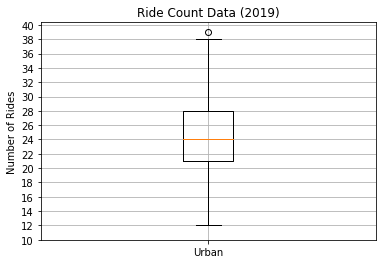

In [179]:
# Create a box-and-whisker plot for Urba Cities
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

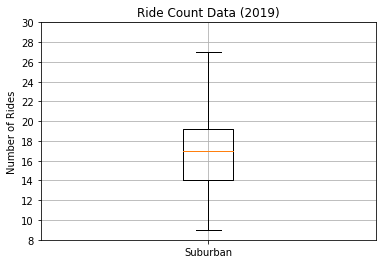

In [182]:
# Suburban Cities
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(8, 31, step=2.0))
ax.grid()
plt.show()

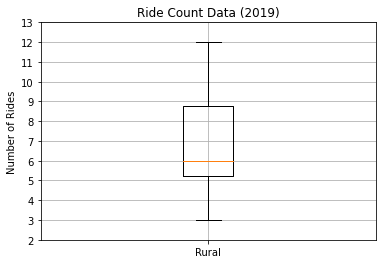

In [185]:
# Rural Cities
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(2, 14, step=1.0))
ax.grid()
plt.show()

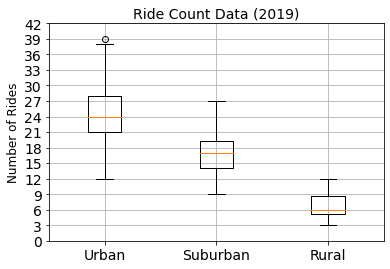

In [268]:
# Create a box-and-whisker plot including all City types
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots()
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title("Ride Count Data (2019)", fontsize=14)
ax.set_ylabel("Number of Rides", fontsize=12)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.savefig("Analysis/Fig2.png")
plt.show()

In [189]:
# Now we can find the urban city that has the highest number of rides, the outlier
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


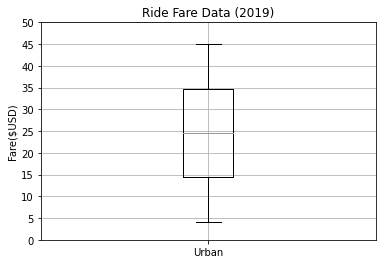

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [192]:
# Fare box-and-whisker plots
# Urban Cities
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

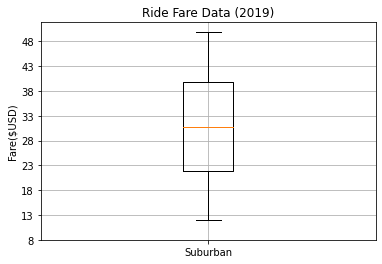

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [200]:
# Skill Drill
# Suburban Cities
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(8, 52, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

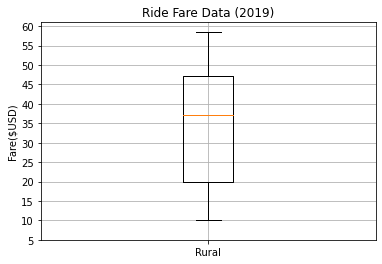

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [202]:
# Skill Drill
# Rural Cities
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(5, 61, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

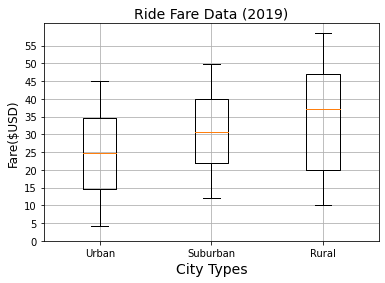

In [207]:
# Skill Drill: Combine all 3
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots()
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_title("Ride Fare Data (2019)", fontsize=14)
ax.set_ylabel("Fare($USD)", fontsize=12)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 56, step=5.0))
ax.grid()
plt.savefig("Analysis/Fig3.png")
plt.show()

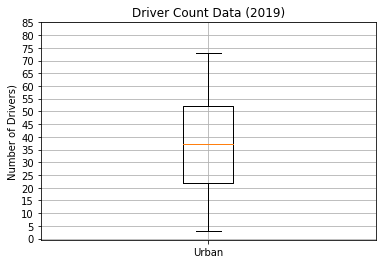

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [208]:
# Box-and-Whisker Plots for Driver Count Data

# Urban Cities
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

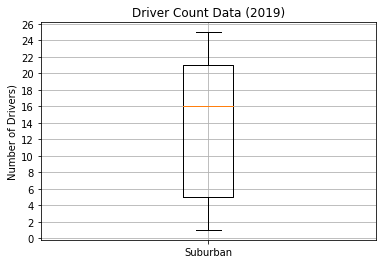

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [210]:
# Skill Drill
# Suburban Cities
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 27, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

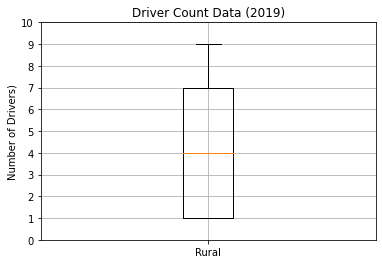

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [217]:
# Skill Drill
# Rural Cities
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 11, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

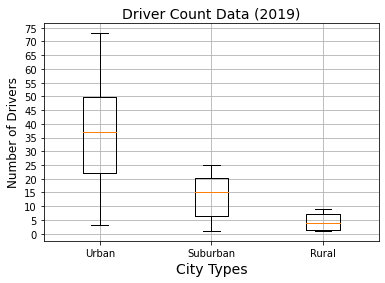

In [219]:
# Skill Drill: Combine all 3
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots()
driver_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_title("Driver Count Data (2019)", fontsize=14)
ax.set_ylabel("Number of Drivers", fontsize=12)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
plt.savefig("Analysis/Fig4.png")
plt.show()

#### Get the Percentage of Fares for Each City Type

In [223]:
# Get totals by City Tpye
sum_fare_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [224]:
# Get Total
total_fares = pyber_data_df.sum()["fare"]
total_fares

63538.64

In [226]:
# Calculate percentage of fare by city type
type_percents = 100 * sum_fare_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [228]:
# Same as above but all calculations were done inline, no separate code was necessary
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

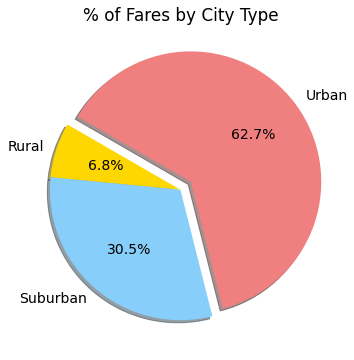

In [252]:
# Let's create a pie chart
import matplotlib as mpl
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels=["Rural","Suburban","Urban"], 
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("% of Fares by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("Analysis/Fig5.png")
plt.show()

In [244]:
# Now create a Pie chart for the percentages of rides
# Get Total rides per type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [248]:
# Get Total rides
total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

In [250]:
# Calculate percentages
ride_pencents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] /  pyber_data_df.count()["type"]
ride_pencents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

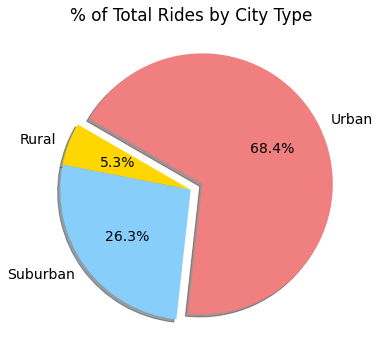

In [253]:
# Let's create a pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_pencents, 
        labels=["Rural","Suburban","Urban"], 
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("Analysis/Fig6.png")
plt.show()

In [259]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


#### Using the city_data_df DataFrame
We should use this dataFrame since it is grouped already by city

In [263]:
# Now create a Pie chart for the percentages of drivers 
drivers_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
drivers_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

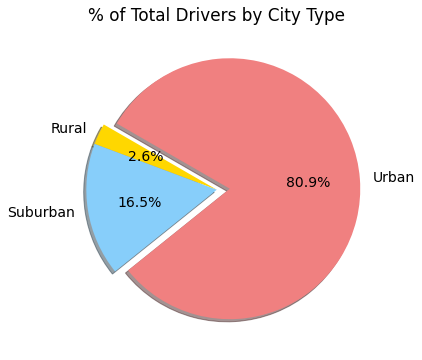

In [262]:
# Let's create a pie chart
plt.subplots(figsize=(10,6))
plt.pie(drivers_percents, 
        labels=["Rural","Suburban","Urban"], 
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("Analysis/Fig7.png")
plt.show()